In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
import matplotlib

# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize-8,
    "ytick.labelsize": fontsize-8,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize-3,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

\begin{align}
    \label{eq:shot_noise_spectral_density}
    S^{1/2}_{n}(f)|_{\rm shot} &= \sqrt{\frac{2\hbar\omega_{\rm L}}{P}}\, 
    \frac{\lambda_{\rm L}\, \sqrt{1 + (f/f_{\rm p})^{2}}}{8\mathcal{F}L} \nonumber \\
    &= 1.66\times 10^{-23} \, {\rm Hz^{-1/2}}\, \left(\frac{50}{\mathcal{F}}\right)\, \left(\frac{3 {\rm km}}{L}\right)\, \left(\frac{1 {\rm kW}}{P_0}\right)^{1/2}\, \sqrt{1 + (f/f_{\rm p})^{2}},
\end{align}



\begin{align}
    \label{eq:radiation_pressure_noise_spectral_density}
    S^{1/2}_{n}(f)|_{\rm rad} &= \frac{2}{L}\, \frac{2\mathcal{F}}{\pi}\,   \frac{S_{x}^{1/2}(f)}{\sqrt{1+(f/f_{\rm p})^{2}}}\nonumber \\
    &= \frac{16 \sqrt{2}\mathcal{F}}{M\, L (2\pi f)^{2}}\, 
    \sqrt{\frac{\hbar}{2\pi}\, \frac{P_{\rm bs}}{\lambda_{\rm L}c}}\, \frac{1}{\sqrt{1+(f/f_{\rm p})^{2}}},
\end{align}

\begin{equation}
    \label{eq:standard_quantum_limit_explicit_PSD}
    S^{1/2}_{n}(f;\, f_{0})|_{\rm opt} = \frac{1}{\pi f_{0} L}\, \sqrt{\frac{\hbar}{M}}\, \left[\left(1+\frac{f^{2}}{f_{\rm p}^{2}}+\frac{f_{0}^{4}}{f^{4}}\, \frac{1}{1+f^{2}/f_{\rm p}^{2}}\right)\right]^{1/2},
\end{equation}

In [62]:
def shot_noise_ASD(f, F = 50, L=3000, P0=1000, fp = 500):
    """
    Default values are for initial Virgo
    """
    
    prefactor = 1.66e-23*50*3000*np.sqrt(1000)
    return prefactor*np.sqrt(1+(f/fp)**2)/(F*L*np.sqrt(P0))

c = 2.99792458e8
hbar = 1.05457182e-34

def radiation_pressure_ASD(f, F=50, lambda_L = 1.064e-6, Pbs = 1000, M = 21, L = 3000, fp=500):
    """
    Default values should correspond to initial Virgo
    """
    
    factor1 = 16*np.sqrt(2)*F/(M*L*(2*np.pi*f)**2)
    factor2 = np.sqrt(hbar*Pbs/(2*np.pi*lambda_L*c))
    
    return factor1*factor2/np.sqrt(1+(f/fp)**2)

def optical_read_out_noise_f0(f, f0, M=21, L = 3000, fp = 500):
    factor1 = 1/(np.pi*f0*L)*np.sqrt(hbar/M)
    factor2 = np.sqrt(1+(f/fp)**2+(f0/f)**4/(1+f/fp)**2)
    
    return factor1*factor2

def shot_f0(f, f0, F=50, lambda_L = 1.064e-6, Pbs = 1000, M = 21, L = 3000, fp=500):
    return 1/(np.pi*f0*L)*np.sqrt(hbar/M)*np.sqrt(1+(f/fp)**2)

def radiation_f0(f, f0, F=50, lambda_L = 1.064e-6, Pbs = 1000, M = 21, L = 3000, fp=500):
    return 1/(np.pi*f0*L)*np.sqrt(hbar/M)*np.sqrt((f0/f)**4/(1+f/fp)**2)

def f0(F=50, Pbs = 1000, lambda_L=1.064e-6, M=21):
    return 8*F/(2*np.pi)*np.sqrt(Pbs/(np.pi*lambda_L*c*M))

def standard_quantum_limit(f, L=3000, M=21):
    return np.sqrt(8*hbar/M)/(2*np.pi*f*L)

print(f0())

13.877600266284295


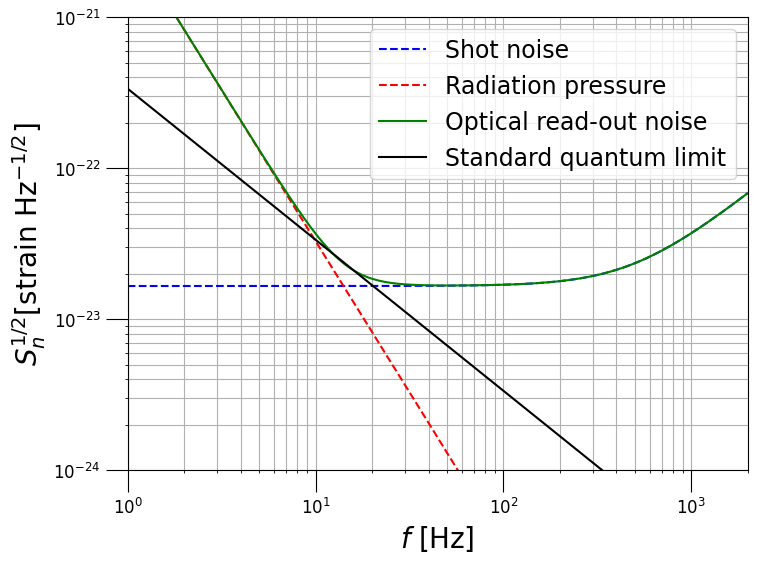

In [66]:
f = np.logspace(0, np.log10(2000), 201)
shot = shot_noise_ASD(f)#shot_f0(f, f0 = f0())#
radiation_pressure = radiation_pressure_ASD(f)#radiation_f0(f, f0=f0())# 
optical_readout_noise = np.sqrt(np.abs(shot)**2+np.abs(radiation_pressure)**2)
sql = standard_quantum_limit(f)

plt.loglog(f, shot, color = "blue", label ="Shot noise", linestyle = "dashed")
plt.loglog(f, radiation_pressure, color = "red", label ="Radiation pressure", linestyle = "dashed")
plt.loglog(f, optical_readout_noise, color = "green", label = "Optical read-out noise")
plt.loglog(f, sql, color = "black", label = "Standard quantum limit")

plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$S_{n}^{1/2} [$strain $\mathrm{Hz^{-1/2}}$]")

plt.xlim(1, 2000)
plt.ylim(1e-24, 1e-21)

plt.grid(which="both")
plt.legend()
plt.savefig("./quantum_noise.pdf", bbox_inches = "tight")
plt.show()

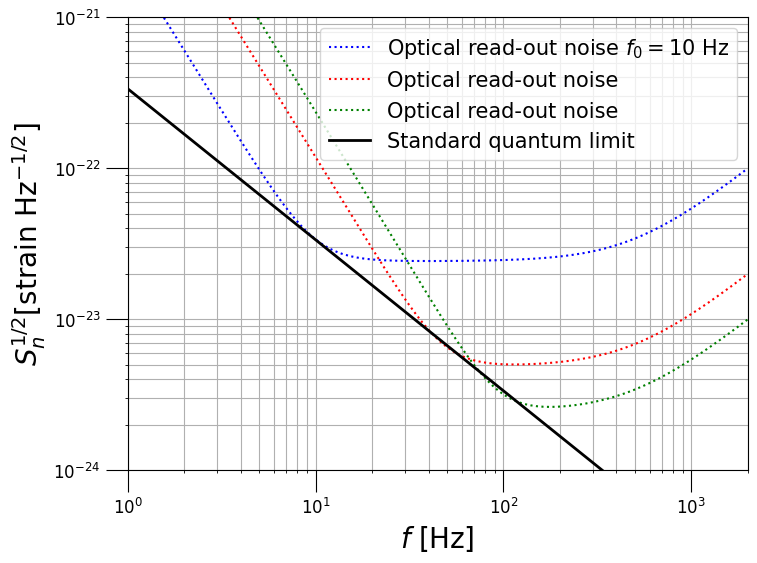

In [60]:


optical_readout_noise_10 = optical_read_out_noise_f0(f, f0=10, M=20.3)
optical_readout_noise_50 = optical_read_out_noise_f0(f, f0=50, M=20.3)
optical_readout_noise_100 = optical_read_out_noise_f0(f, f0=100, M=20.3)

plt.loglog(f, optical_readout_noise_10, color = "blue", label = r"Optical read-out noise $f_{0}=$10 Hz", linestyle = "dotted")
plt.loglog(f, optical_readout_noise_50, color = "red", label = "Optical read-out noise", linestyle = "dotted")
plt.loglog(f, optical_readout_noise_100, color = "green", label = "Optical read-out noise", linestyle = "dotted")
plt.loglog(f, sql, color = "black", label = "Standard quantum limit", linewidth = 2)

plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$S_{n}^{1/2} [$strain $\mathrm{Hz^{-1/2}}$]")

plt.xlim(1, 2000)
plt.ylim(1e-24, 1e-21)

plt.grid(which="both")
plt.legend()
plt.show()